In [1]:
from IPython.display import Image

#### 利用sklearn构建感知机分类器.

In [4]:
# 从sklearn中读取iris数据集.
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# np.unique(y) 的目的是找出 y 中所有不同的分类标签，并将它们打印出来.
#  Iris-setosa, Iris-versicolor, and Iris-virginica.
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [5]:
# 训练集和测试集划分.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 1, stratify=y)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(105, 2) (45, 2)
(105,) (45,)


通过设置stratify=y, 在这种情况下，分层意味着 train_test_split 方法返回具有与输入数据集相同类标签比例的训练和测试子集.

In [6]:
# 使用 np.bincount(y_train) 的目的是统计每个分类标签在数据集中出现的次数.
print('Labels count in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels count in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [9]:
"""
    如Chapter2中提到的那样，Gradient Descent等算法对特征尺度敏感，因此
    这里首先进行特征标准化处理。
"""
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

# 标准化变换.
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print(X_train.mean(), X_train.std())
print(X_train_std.mean(), X_train_std.std())

2.4933333333333327 1.891674323458387
1.0150610510858574e-16 0.9999999999999999


In [11]:
# 利用sklearn构建一个感知器分类模型.
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [12]:
y_pred = ppn.predict(X_test_std)
print('错误分类的样本数量: %d' %(y_test != y_pred).sum())

错误分类的样本数量: 1


In [14]:
# 使用sklearn.metrics中提供的模型评估指标.
from sklearn.metrics import accuracy_score

print("The trained model's Accuracy: %.3f" % accuracy_score(y_test, y_pred))

The trained model's Accuracy: 0.978


In [15]:
"""
scikit-learn 中的每个分类器都有一个 score 方法，
该方法通过将 predict 调用与 accuracy_score 相结合来计算分类器的预测准确率.
"""
print("The trained model's Accuracy: %.3f" % ppn.score(X_test_std, y_test))

The trained model's Accuracy: 0.978


In [16]:
# 预测结果可视化--绘制决策边界(plot_decision_regions).
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # 设置Marker生成器和color map.
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 绘制决策曲面.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 绘制类别样本.
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # 对测试集样本高亮显示.
    if test_idx:
        # 绘制所有样本.
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')

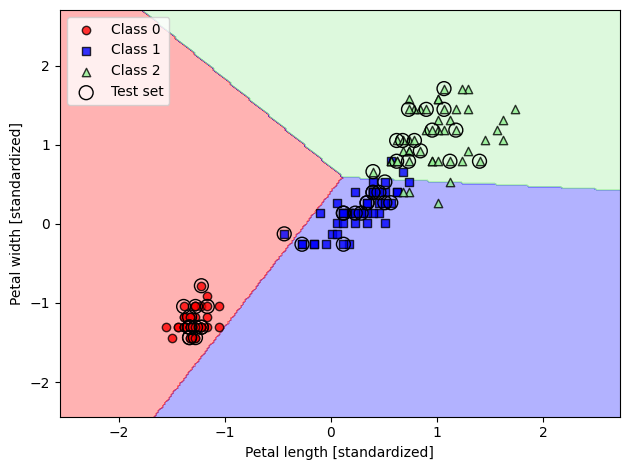

In [18]:
# 调用上述函数.
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, 
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig('../Python-MachineLearning/Attached_images/Chapter3/figures/03_01.png', 
            dpi=600)
plt.show()

从结果图中我们可以看出，三种花卉类别无法通过线性决策边界完美地分开。

#### 通过逻辑回归建模类别概率

感知器最大的缺点是，如果类别不是完全线性可分的，它就永远不会收敛。上一节中的分类任务就是这种情况的一个例子。

逻辑回归是一种非常容易实现的分类模型，在线性可分类别上表现非常好。它是工业界最广泛使用的分类算法之一。 与感知器和 Adaline 类似，本章中的逻辑回归模型也是二分类的线性模型。

##### 几率odds

为了解释逻辑回归背后的主要机制，这里首先了解一下几率(odds)--有利于特定事件发生的可能性，其记录为$\frac{p}{(1-p)}$, 其中$p$代表positive event事件发生的概率。

其中，"positive event"并不一定意味着"好", 而是我们想要预测的事件。比如，给定某些症状，换着患有某种疾病的概率。为简便起见，将概率$p$定义为:
$$p:=p(y=1|x)$$
即，给定特征$x$, 特定样本属于类别1的条件概率(conditional probability)。

进一步可以定义logit function, 它是几率的对数：
$$\mathrm{logit}(p)=\mathrm{log}\frac p{(1-p)}$$

在Logistic model中，假设加权输入(在Chapter2中被称为净输入net input)与对数几率之间存在线形关系：
$$\mathrm{logit}(p)=w_1x_1+\cdots+w_mx_m+b=\sum_{i=j}w_jx_j+b=\boldsymbol{w}^T\boldsymbol{x}+b$$

在上述内容中，讨论了对数几率和净输入之间的线性关系这一假设。但在实际生产活动中，我们关注的是具体的概率$p$。因此怎样根据输入的加权组合得到具体的概率值？

这时候，可以考虑概函数的逆函数(inverse function), 从而实现将实数范围映射到$[0,1]$。该Logit function的逆函数通常被称为Logistic sigmoid function, 有时候也简称为sigmoid function：


$$
\sigma(z)=\frac1{1+e^{-z}}
$$

在上式中，$z$是净输入，并记录为$\boldsymbol{w}^T\boldsymbol{x}+b$。

In [ ]:
# S型函数绘制.
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)

plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')

plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
#plt.savefig('../Python-MachineLearning/Attached_images/Chapter3/figures/03_02.png', dpi=600)
plt.show()